In [100]:
# Importing the pandas module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Reading in the data
df = pd.read_excel('data/chocolate_bars.xlsx')
# Take a look at the first datapoints
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,785,Daintree,Australia,2011,Australia,"Daintree Estates, N. Queensland",0.70,5.0,"B,S,C,V,L","vanilla, banana, citrus",3.25
1,1654,Daintree,Australia,2015,Australia,Goodman Estate,0.70,3.0,"B,S,C","sandy, candy like vanilla, off",2.75
2,1864,"Smooth Chocolator, The",Australia,2016,Australia,Australia,0.67,3.0,"B,S,C","delicate, smooth, dairy",3.75
3,1494,Ambrosia,Canada,2015,Belize,Belize,0.64,4.0,"B,S,C,L","roasty, brownie, nutty",3.00
4,2586,Animas,U.S.A.,2021,Belize,"Maya Mountain, batch 39",0.75,2.0,"B,S","burnt toast, cherry",3.00


# Finding the best chocolate bars

Now let's now move on to the competition and challenge.

## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

,id,year_reviewed,cocoa_percent,num_ingredients,rating
id,1.000000,0.993126,0.015835,-0.356845,0.113398
year_reviewed,0.993126,1.000000,0.016484,-0.362956,0.116256
cocoa_percent,0.015835,0.016484,1.000000,-0.187468,-0.146690
num_ingredients,-0.356845,-0.362956,-0.187468,1.000000,-0.098834
rating,0.113398,0.116256,-0.146690,-0.098834,1.000000


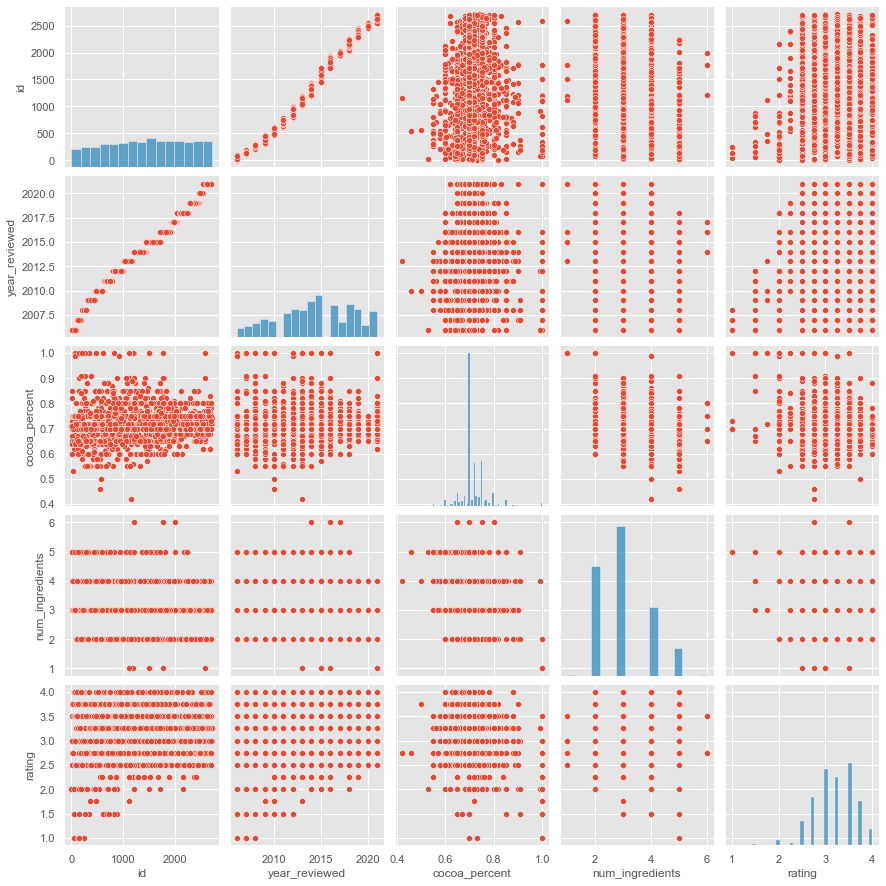

In [103]:
#Generate a pairwise scatterplot to explore the data
display(sns.pairplot(df))
# Compute the correlation coefficient for all column pairs
corr_columns = df.corr()
display(corr_columns)

### Challenge 1: The average rating by country of origin
* We need to Group By "bean_origin" and run .mean() on "rating" column

In [91]:
groupOrigin = df.groupby("bean_origin")["rating"].mean().reset_index()
groupOrigin.head()

,bean_origin,rating
0,Australia,3.250000
1,Belize,3.233553
2,Blend,3.038462
3,Bolivia,3.181250
4,Brazil,3.262821


### Challenge 2: Number of bars reviewed for each of those countries
* We need to Group By "bean_origin" and run .count() on "bar_name" column

In [92]:
groupOriginBarCount = df.groupby("bean_origin")["bar_name"].nunique().reset_index()
groupOriginBarCount.head()

,bean_origin,bar_name
0,Australia,3
1,Belize,40
2,Blend,140
3,Bolivia,57
4,Brazil,55


### Challenge3: 1 & 2 Visuals

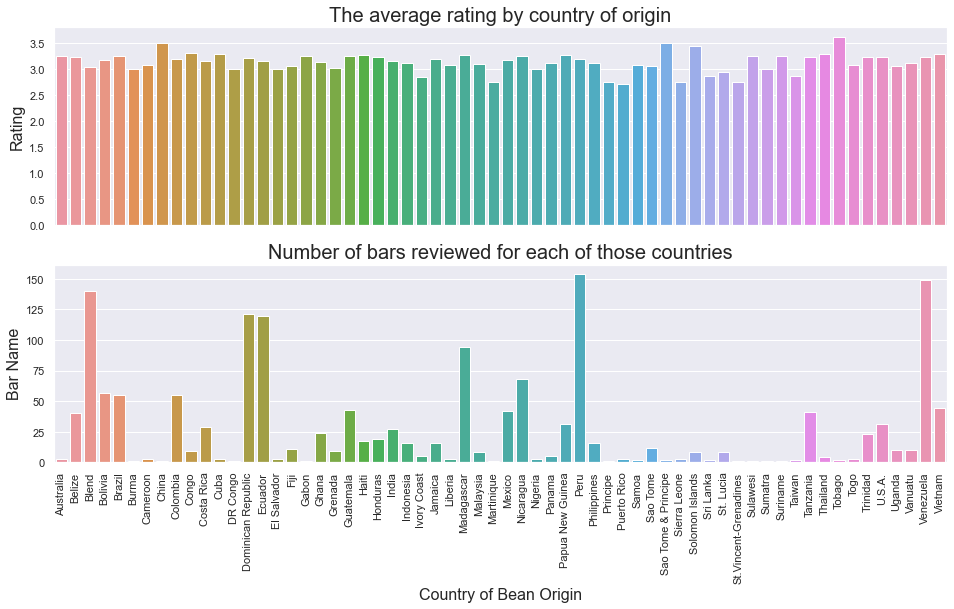

In [93]:
sns.set(rc={'figure.figsize':(16,8)})
f, axes = plt.subplots(2, 1, sharex=True)


sns.barplot(x = "bean_origin", y = "rating", data = groupOrigin,   ax=axes[0])
sns.barplot(x = "bean_origin", y = "bar_name", data = groupOriginBarCount , ax=axes[1])

plt.xticks(rotation='vertical')

axes[0].set_title("The average rating by country of origin", size = 20)
axes[1].set_title("Number of bars reviewed for each of those countries", size = 20)
axes[0].set(xlabel=None)
axes[1].set_xlabel(xlabel="Country of Bean Origin", fontsize=16)

axes[0].set_ylabel(ylabel="Rating", fontsize=16)
axes[1].set_ylabel(ylabel="Bar Name", fontsize=16)


# Display figure
plt.show()

### Challenge 4: Is the cacao bean's origin an indicator of quality?


In [94]:
#Quality indicator decision.
# We can use the "rating" values. Recalling:
# "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding
# Origins which mean rating is higher than 3.0 (Recommended rating) percentage may give us an idea
# Lets say if this percentage is higher than 70%, we can say "origin" is an indicator of quality

# Get the statistics of ratings, per origin:
qualityTable = df.groupby(["bean_origin"]).describe()["rating"]
qualityTable

,count,mean,std,min,25%,50%,75%,max
bean_origin,,,,,,,,
Australia,3.0,3.250000,0.500000,2.75,3.00,3.25,3.5,3.75
Belize,76.0,3.233553,0.324899,2.50,3.00,3.25,3.5,4.00
Blend,156.0,3.038462,0.637633,1.00,2.75,3.00,3.5,4.00
Bolivia,80.0,3.181250,0.435699,2.00,3.00,3.25,3.5,4.00
Brazil,78.0,3.262821,0.416575,1.75,3.00,3.25,3.5,4.00
...,...,...,...,...,...,...,...,...
U.S.A.,33.0,3.242424,0.435194,2.00,3.00,3.25,3.5,3.75
Uganda,19.0,3.065789,0.439713,2.50,2.75,3.00,3.5,3.75
Vanuatu,13.0,3.115385,0.440352,2.50,2.75,3.00,3.5,3.75


In [95]:
# Number of origins
n_origin = len(qualityTable)
n_origin

62

In [96]:
recommendedTable = qualityTable[qualityTable["mean"] >= 3.0].reset_index()
display(recommendedTable.head())
n_recommended = len(recommendedTable)
n_recommended

,bean_origin,count,mean,std,min,25%,50%,75%,max
0,Australia,3.0,3.250000,0.500000,2.75,3.00,3.25,3.5,3.75
1,Belize,76.0,3.233553,0.324899,2.50,3.00,3.25,3.5,4.00
2,Blend,156.0,3.038462,0.637633,1.00,2.75,3.00,3.5,4.00
3,Bolivia,80.0,3.181250,0.435699,2.00,3.00,3.25,3.5,4.00
4,Brazil,78.0,3.262821,0.416575,1.75,3.00,3.25,3.5,4.00


53

In [97]:
indicatorPercent = 100 * (n_recommended / n_origin)
print("indicatorPercent:", "{:.2f}".format(indicatorPercent), "%")
# we can sayç, yes

indicatorPercent: 85.48 %


### Challenge 5: How does cocoa content relate to rating?
* What is the average cocoa content for bars with higher ratings (above 3.5)?

In [98]:
cocoaContentFilter = df.groupby(["cocoa_percent"]).describe()["rating"]
cocoaContentFilter

,count,mean,std,min,25%,50%,75%,max
cocoa_percent,,,,,,,,
0.420,1.0,2.750000,NaN,2.75,2.7500,2.750,2.7500,2.75
0.460,1.0,2.750000,NaN,2.75,2.7500,2.750,2.7500,2.75
0.500,1.0,3.750000,NaN,3.75,3.7500,3.750,3.7500,3.75
0.530,1.0,2.000000,NaN,2.00,2.0000,2.000,2.0000,2.00
0.550,16.0,2.859375,0.364792,2.25,2.6875,2.750,3.0625,3.50
0.560,2.0,3.250000,0.000000,3.25,3.2500,3.250,3.2500,3.25
0.570,1.0,2.750000,NaN,2.75,2.7500,2.750,2.7500,2.75
0.580,8.0,3.125000,0.422577,2.50,2.8750,3.250,3.5000,3.50
0.600,46.0,3.005435,0.355470,2.00,2.7500,3.000,3.2500,4.00
